Music Genre Classification with GTZAN Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay


In [3]:
data_30s = pd.read_csv(r'C:\Users\kadda\PycharmProjects\scientificProject\data\features_30_sec.csv')
data_3s = pd.read_csv(r'C:\Users\kadda\PycharmProjects\scientificProject\data\features_3_sec.csv')

print(data_30s.head())
print(data_3s.head())

print(data_30s.isnull().sum())
print(data_3s.isnull().sum())

          filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.wav  661794          0.350088         0.088757  0.130228   
1  blues.00001.wav  661794          0.340914         0.094980  0.095948   
2  blues.00002.wav  661794          0.363637         0.085275  0.175570   
3  blues.00003.wav  661794          0.404785         0.093999  0.141093   
4  blues.00004.wav  661794          0.308526         0.087841  0.091529   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.002827             1784.165850          129774.064525   
1  0.002373             1530.176679          375850.073649   
2  0.002746             1552.811865          156467.643368   
3  0.006346             1070.106615          184355.942417   
4  0.002303             1835.004266          343399.939274   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              2002.449060            85882.761315  ...   52.420910   
1              2039.036516        

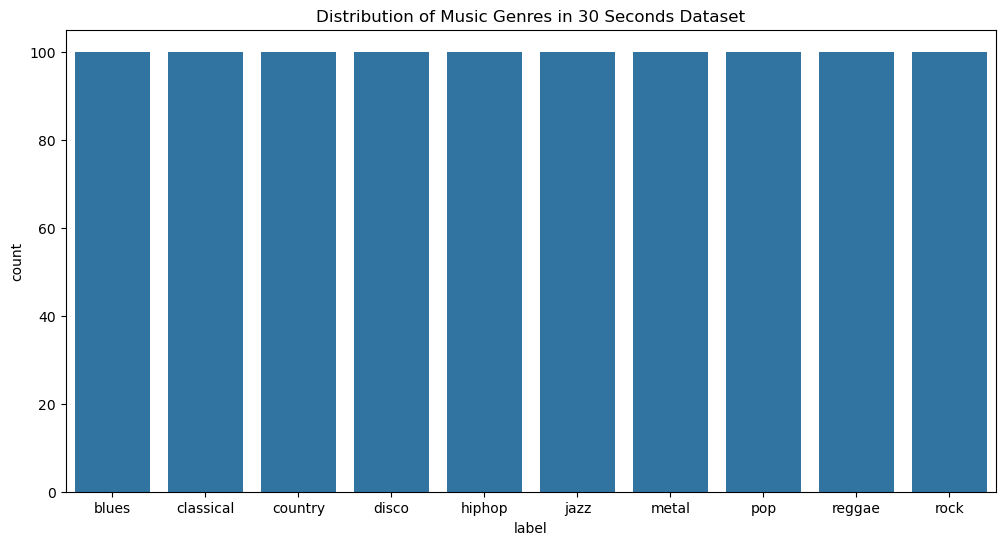

In [44]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data_30s, x='label')
plt.title('Distribution of Music Genres in 30 Seconds Dataset')
plt.show()


In [16]:
le = LabelEncoder()
data_30s['genre_encoded'] = le.fit_transform(data_30s['label'])

X = data_30s.drop(['filename', 'label'], axis=1)  
y = data_30s['label']  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Accuracy: 0.93
Confusion Matrix:
 [[20  0  0  0  0  0  0  0  0  0]
 [ 0 13  0  0  0  0  0  0  0  0]
 [ 1  0 24  1  0  0  1  0  0  0]
 [ 0  0  0 19  2  0  0  0  0  0]
 [ 0  0  0  0 15  0  0  0  0  0]
 [ 0  0  0  0  1 21  0  0  0  0]
 [ 0  0  0  0  0  0 25  0  0  0]
 [ 0  0  0  0  0  0  0 11  2  0]
 [ 0  0  1  0  1  0  1  0 19  1]
 [ 0  0  0  0  0  0  0  0  2 19]]
Classification Report:
               precision    recall  f1-score   support

       blues       0.95      1.00      0.98        20
   classical       1.00      1.00      1.00        13
     country       0.96      0.89      0.92        27
       disco       0.95      0.90      0.93        21
      hiphop       0.79      1.00      0.88        15
        jazz       1.00      0.95      0.98        22
       metal       0.93      1.00      0.96        25
         pop       1.00      0.85      0.92        13
      reggae       0.83      0.83      0.83        23
        rock       0.95      0.90      0.93        21

    accuracy   

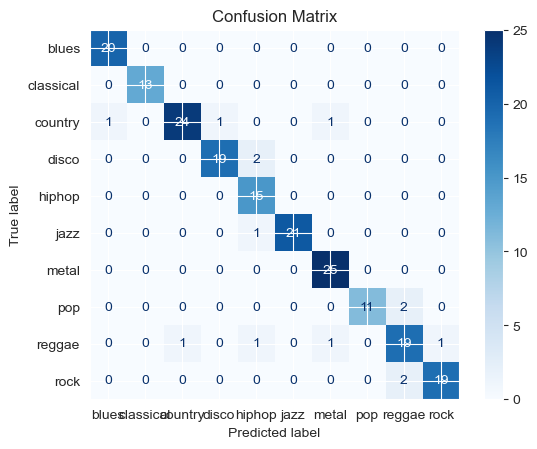

In [11]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [14]:
cv_scores = cross_val_score(model, X_scaled, y, cv=5)
print("Cross-Validation Accuracy:", np.mean(cv_scores))


Cross-Validation Accuracy: 0.9019999999999999


Hyperparameter Tuning

In [15]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

# Re-train model with best parameters
best_model = grid_search.best_estimator_


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


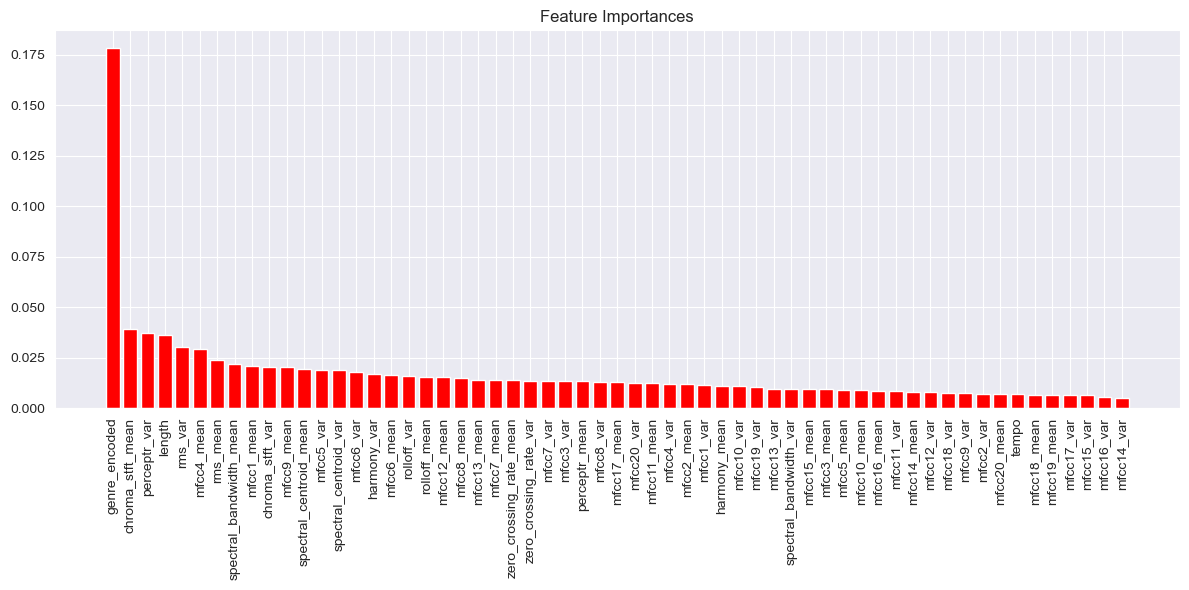

In [17]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], color='r', align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()


In [18]:
X_3s = data_3s.drop(['filename', 'label'], axis=1)
y_3s = le.fit_transform(data_3s['label'])

# Standardize Features
X_3s_scaled = scaler.fit_transform(X_3s)

# Train-Test Split
X_train_3s, X_test_3s, y_train_3s, y_test_3s = train_test_split(X_3s_scaled, y_3s, test_size=0.2, random_state=42)

# Train and Evaluate Random Forest Model
model.fit(X_train_3s, y_train_3s)
y_pred_3s = model.predict(X_test_3s)
print("Accuracy on 3-Second Data:", accuracy_score(y_test_3s, y_pred_3s))


Accuracy on 3-Second Data: 0.8828828828828829
